## Read table model

In [1]:
%matplotlib inline
%matplotlib notebook

from generate_table import read_table
from astromodels import *


import matplotlib.pyplot as plt
import numpy as np


## Reading the table

First we read the table in and use the eta values listed in the file. 
I've made my own txt file to store the info.

We will not use a data_cut yet


In [2]:
eta = np.array([1.E2, 3.16E1, 1E1, 3.16, 1 , 3.16E-1])

read_table(table_file="table.txt",
           eta_list=eta,
           save_name="lundman",
           model_name="Photosphere",
           data_cut=None)

/usr/local/Cellar/python/HEAD/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/astromodels-0.2.3-py2.7-macosx-10.11-x86_64.egg/astromodels/functions/template_model.py:56: UserWarning: Energy unit is not a Quantity instance, so units has not been provided. Using keV.
/usr/local/Cellar/python/HEAD/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/astromodels-0.2.3-py2.7-macosx-10.11-x86_64.egg/astromodels/functions/template_model.py:159: UserWarning: You have zeros in the differential flux. Since the interpolation happens in the log space, this cannot be accepted. We will substitute zeros with 1e-50


Now simply load the data stored on the disk

In [3]:
model = TemplateModel('lundman')

The model comes with a normalization and scale parameter baked in. The scale parameter was envisioned to be something else, but is the same as a **peak** parameter becasue peak parameters simply scale the energy

<IPython.core.display.Javascript object>


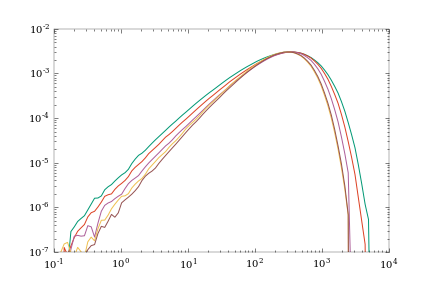

(1e-07, 0.01)

In [4]:
fig, ax = plt.subplots()

# energy grid
energy=np.logspace(-1,4,100)


# we will loop through some eta values
# to check

for eta_value in np.logspace(-.2,1.4,5): 

    model.K.value = 1 # the normalization
    
    
    model.eta.value= eta_value

    # The scale parameter
    model.scale.value = 300
    
    
    
    ax.loglog(energy,model(energy))

    
ax.set_ylim(1E-7)

## model with a cut


The monte carlo noise is a bit annoying, so can cut at some level to remove that

In [11]:
eta = np.array([1.E2, 3.16E1, 1E1, 3.16, 1 , 3.16E-1])

read_table(table_file="table.txt",
           eta_list=eta,
           save_name="lundman_cut",
           model_name="Photosphere",
           data_cut=5E-1)

In [12]:
model_cut = TemplateModel('lundman_cut')

<IPython.core.display.Javascript object>


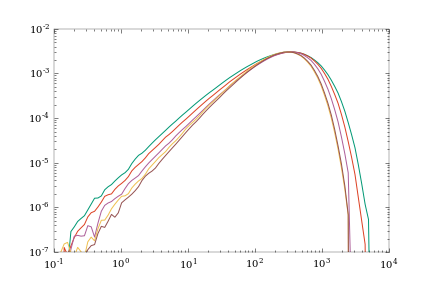

(1e-07, 0.01)

In [13]:
fig, ax = plt.subplots()

# energy grid
energy=np.logspace(-1,4,100)


# we will loop through some eta values
# to check

for eta_value in np.logspace(-.2,1.4,5): 

    model_cut.K.value = 1 # the normalization
    
    
    model_cut.eta.value= eta_value

    # The scale parameter
    model_cut.scale.value = 300
    
    
    
    ax.loglog(energy,model_cut(energy))

    
ax.set_ylim(1E-7)